In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import KFold, cross_val_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data = pd.read_csv("/content/Lable_Dataset.csv")

In [ ]:
print(data.head())
print(data.columns)
data.info()
data.describe()

   Position Reference_Codon Query_Codon          Mutation_Type
0         5             AAA         AAC  Missense Substitution
1        44             TCG         TCA    Silent Substitution
2        81             ATC         TTC  Missense Substitution
3        99             CGG         GGG  Missense Substitution
4       186             AGG         CGG    Silent Substitution
Index(['Position', 'Reference_Codon', 'Query_Codon', 'Mutation_Type'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         1069 non-null   int64 
 1   Reference_Codon  1069 non-null   object
 2   Query_Codon      1069 non-null   object
 3   Mutation_Type    1069 non-null   object
dtypes: int64(1), object(3)
memory usage: 33.5+ KB


,Position
count,1069.000000
mean,15135.072965
std,8598.619854
min,5.000000
25%,7827.000000
50%,15296.000000
75%,22219.000000
max,30204.000000


In [ ]:
#function for one hot encoding of DNA sequence:
def ordinal_encode(sequence):
    encoding = {'A': 1, 'T': 2, 'C': 3, 'G': 4}
    return [encoding[base] for base in sequence if base in encoding]


In [ ]:
#run this code once because it encodes the encoded columns when run again
#encoding DNA sequence to integars:
data['Reference_Codon'] = data['Reference_Codon'].apply(ordinal_encode)
data['Query_Codon'] = data['Query_Codon'].apply(ordinal_encode)

In [ ]:
# Convert each list to a single integer, handling empty lists
data['Reference_Codon'] = data['Reference_Codon'].apply(lambda x: int("".join(map(str, x))) if x else 0) # If x is empty, use 0
data['Query_Codon'] = data['Query_Codon'].apply(lambda x: int("".join(map(str, x))) if x else 0) # If x is empty, use 0

In [ ]:
#encoding categorical variable
lab = LabelEncoder()
data['Mutation_Type']=lab.fit_transform(data['Mutation_Type'])

In [ ]:
data['Mutation_Type'] = data['Mutation_Type'].astype(object)

In [ ]:
#checking the datatypes of specific columns in our dataframe:
data.select_dtypes(include = 'object').columns

Index(['Mutation_Type'], dtype='object')

In [ ]:
#Value counts information
for i in data.columns.values:
    print(data[i].value_counts())

Position
5        1
19937    1
19655    1
19678    1
19684    1
        ..
9970     1
10022    1
10029    1
10093    1
30204    1
Name: count, Length: 1069, dtype: int64
Reference_Codon
0      99
222    34
242    32
211    32
111    29
       ..
32      1
42      1
11      1
341     1
22      1
Name: count, Length: 75, dtype: int64
Query_Codon
111    29
242    24
322    24
222    24
221    23
       ..
323     8
144     8
433     7
133     7
434     5
Name: count, Length: 65, dtype: int64
Mutation_Type
3    643
7    187
2     99
6     58
4     48
0     17
1     15
5      2
Name: count, dtype: int64


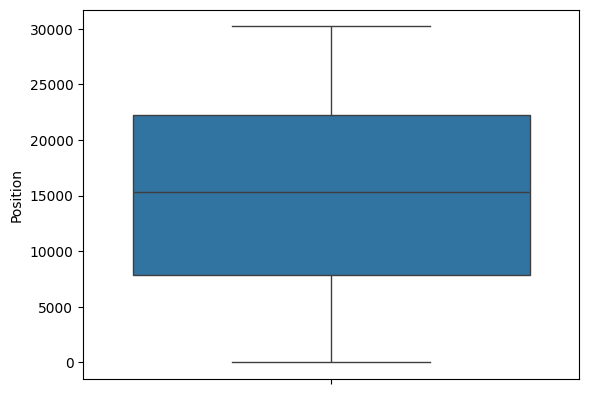

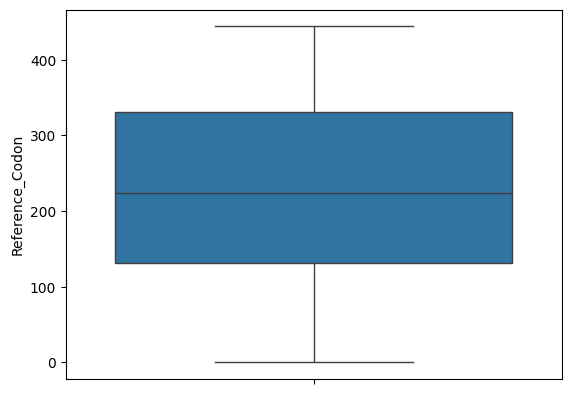

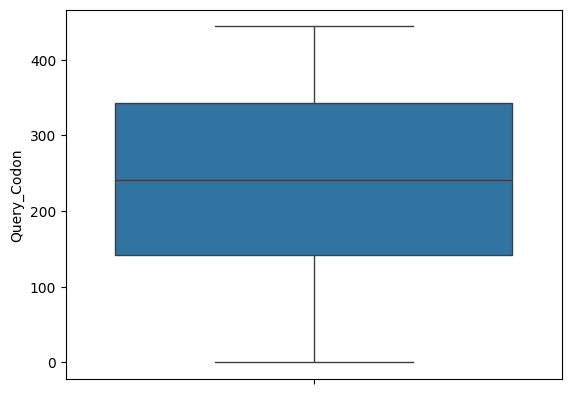

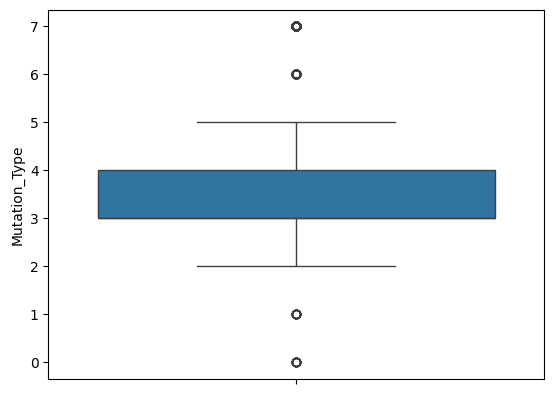

In [ ]:
#making boxplot for outlier identification:
for i in data.columns.values:
    sns.boxplot(data[i])
    plt.show()

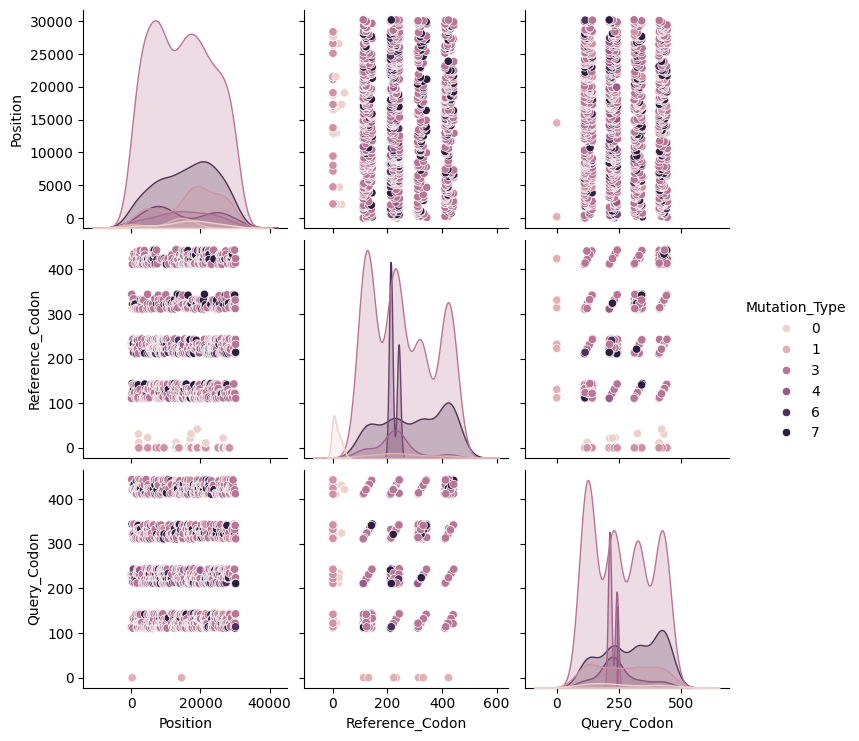

In [ ]:
sns.pairplot(data, hue = "Mutation_Type")
plt.show()

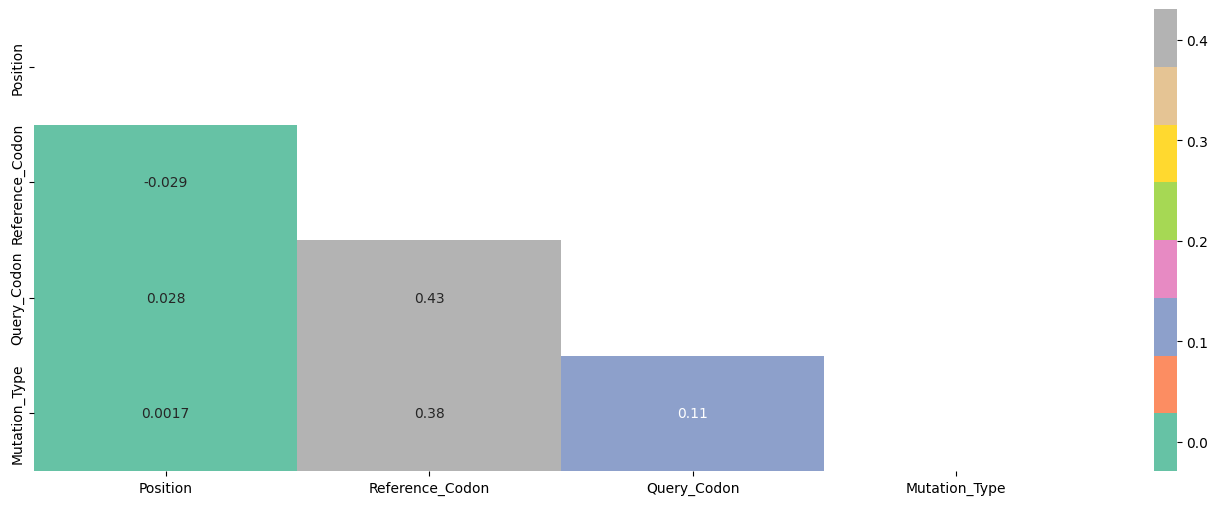

In [ ]:
#correlation plot:
plt.figure(figsize = (17,6))
corr = data.corr(method = 'spearman')
mask_m = np.triu(corr)
sns.heatmap(corr, annot = True, mask = mask_m, cmap ="Set2" )
plt.show()

In [ ]:
data["Mutation_Type"] = data["Mutation_Type"].astype(int)

In [ ]:
#downloading the cleaned dataset:
from google.colab import files

# Assuming your DataFrame is named 'df'
data.to_csv('cleaned_data.csv', index=False)  # Save DataFrame as a CSV file
files.download('cleaned_data.csv')  # Download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = data[["Reference_Codon","Query_Codon","Position"]]
y = data["Mutation_Type"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 12)



# **logistic Regression**

In [ ]:
lr = LogisticRegression()
#K-fold cross validation:
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold cross-validation

# Perform Cross-Validation
scores = cross_val_score(lr, x, y, cv=kf, scoring='accuracy')

# Print Cross-Validation results
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", np.mean(scores))

lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy Scores: [0.71028037 0.69626168 0.6728972  0.72897196 0.657277  ]
Average Accuracy: 0.693137642051687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6912280701754386
0.705607476635514


In [ ]:
cm = confusion_matrix(y_test,lr.predict(x_test))
print(cm)

[[  0   0   6   0   0   0   0]
 [  0   0   0   2   0   0   0]
 [  0   0  21   0   0   0   0]
 [  0   0   0 130   0   0   0]
 [  0   0   0  11   0   0   0]
 [  0   0   0  14   0   0   0]
 [  0   0   0  30   0   0   0]]


In [ ]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         2
           2       0.78      1.00      0.88        21
           3       0.70      1.00      0.82       130
           4       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        30

    accuracy                           0.71       214
   macro avg       0.21      0.29      0.24       214
weighted avg       0.50      0.71      0.58       214



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Filler values must be provided when X has more than 2 training features.

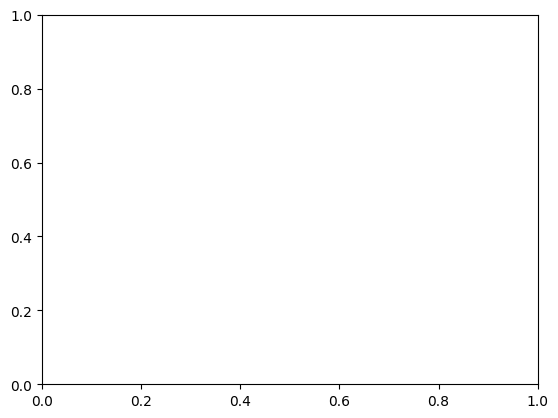

In [ ]:
plot_decision_regions(x_train.to_numpy(),y_train.to_numpy(), clf = logmod)
plt.show()


# **Decision tree**

In [ ]:
dec = DecisionTreeClassifier()
decmod = dec.fit(x_train,y_train)


In [ ]:
print(decmod.score(x_train,y_train))
print(decmod.score(x_test,y_test))

1.0
0.8598130841121495


In [ ]:
cm = confusion_matrix(y_test,decmod.predict(x_test))
print(cm)

[[  6   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  21   0   0   0   0]
 [  0   0   0 115   3   2  10]
 [  0   0   0   3   8   0   0]
 [  0   0   0   1   0   9   4]
 [  0   0   0   5   0   2  23]]


ValueError: Filler values must be provided when X has more than 2 training features.

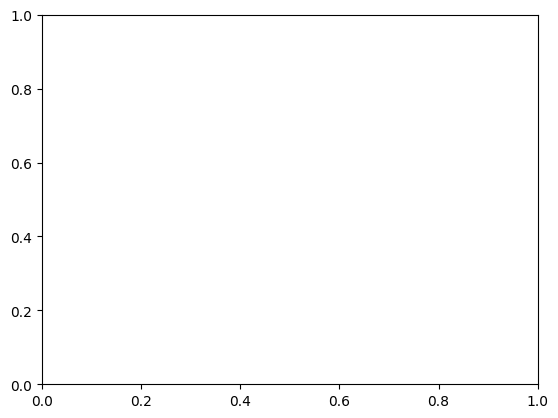

In [ ]:
plot_decision_regions(x_train.to_numpy(),y_train.to_numpy(), clf = decmod)
plt.show()

In [ ]:
rf = RandomForestClassifier()
rfmod = rf.fit(x_train, y_train)

In [ ]:
print(rfmod.score(x_train,y_train))
print(rfmod.score(x_test,y_test))

1.0
0.8457943925233645


In [ ]:
cm = confusion_matrix(y_test, rfmod.predict(x_test))
print(cm)

[[  6   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  21   0   0   0   0]
 [  0   0   0 124   1   1   4]
 [  0   0   0   6   5   0   0]
 [  0   0   0   7   0   7   0]
 [  0   0   0  12   0   2  16]]


ValueError: Filler values must be provided when X has more than 2 training features.

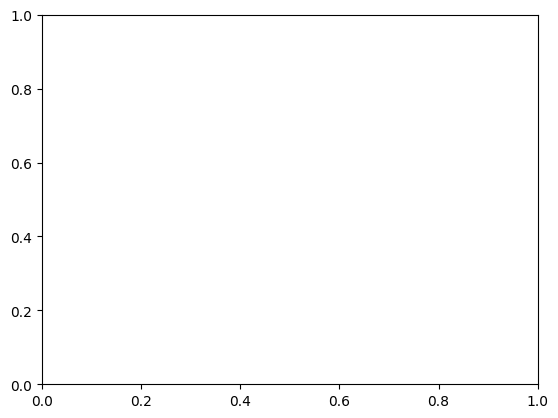

In [ ]:
plot_decision_regions(x_train.to_numpy(),y_train.to_numpy(), clf = rfmod)
plt.show()

# **XGBOOST**

In [ ]:
xgb = XGBClassifier()
xgbmod = xgb.fit(x_train,y_train)


In [ ]:
print(xgbmod.score(x_train,y_train))
print(xgbmod.score(x_test,y_test))

print(confusion_matrix(y_test, xgbmod.predict(x_test)))


1.0
0.9252336448598131
[[  6   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  21   0   0   0   0]
 [  0   0   0 121   0   0   9]
 [  0   0   0   0  11   0   0]
 [  0   0   0   0   0  13   1]
 [  0   0   0   5   0   1  24]]


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


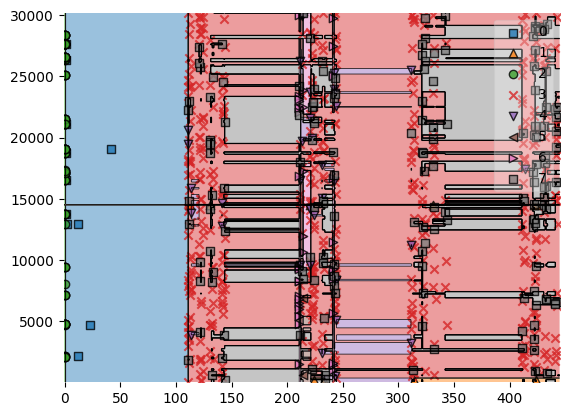

In [ ]:
plot_decision_regions(x_train.to_numpy(),y_train.to_numpy(), clf = xgbmod)
plt.show()

# **LGBM**

In [ ]:
lgbm = LGBMClassifier()
lgbmmod = lgbm.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 3
[LightGBM] [Info] Start training from score -4.353206
[LightGBM] [Info] Start training from score -4.186152
[LightGBM] [Info] Start training from score -2.394393
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Info] Start training from score -3.140184
[LightGBM] [Info] Start training from score -6.057954
[LightGBM] [Info] Start training from score -2.966912
[LightGBM] [Info] Start training from score -1.694856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
print(lgbmmod.score(x_train,y_train))
print(lgbmmod.score(x_test,y_test))

print(confusion_matrix(y_test, lgbmmod.predict(x_test)))

1.0
0.9018691588785047
[[  2   0   0   4   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  21   0   0   0   0]
 [  0   0   0 124   0   0   6]
 [  0   0   0   0  10   0   1]
 [  0   0   0   1   0  11   2]
 [  0   0   0   6   0   1  23]]


# **KNN**

In [ ]:
knn = KNeighborsClassifier()
knnmod = knn.fit(x_train,y_train)

In [ ]:
print(knnmod.score(x_train,y_train))
print(knnmod.score(x_test,y_test))

print(confusion_matrix(y_test,knnmod.predict(x_test)))

0.7134502923976608
0.6448598130841121
[[  0   0   6   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  18   3   0   0   0]
 [  0   0   6 116   1   1   6]
 [  0   0   0  11   0   0   0]
 [  0   0   1  12   0   0   1]
 [  0   0   1  26   0   1   2]]


In [ ]:
#till now xgboost is giving us the best accuracy and the results from confusion matrix are also best from xgbpoost
